In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
import pandas as pd
store = pd.read_csv('../data/store.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Variables
<li>Id - an Id that represents a (Store, Date) duple within the test set</li>

<li>Store - a unique Id for each store

<li>Sales - the turnover for any given day (this is what you are predicting)</li>

<li>Customers - the number of customers on a given day

<li>Open - an indicator for whether the store was open: 0 = closed, 1 = open

<li>StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

<li>SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

<li>StoreType - differentiates between 4 different store models: a, b, c, d

<li>Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

<li>CompetitionDistance - distance in meters to the nearest competitor store

<li>CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

<li>Promo - indicates whether a store is running a promo on that day

<li>Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

<li>Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

<li>PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</li>

In [3]:
train_store = pd.merge(train, store, how = 'left', on = "Store")
test_store = pd.merge(test, store, how = 'left', on = "Store")

<h1>Train Set</h1>

In [4]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [6]:
train_store.shape

(1017209, 18)

In [7]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [8]:
# what is the % of missing values in the dataset?
def percent_missing(train_store):

    # Calculate total number of cells in dataframe
    totalCells = np.product(train_store.shape)

    # Count number of missing values per column
    missingCount = train_store.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(train_store)

The dataset contains 11.87 % missing values.


In [9]:
train_store.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_store['CompetitionDistance'].values.reshape(-1, 1))
train_store['CompetitionDistance'] = imputer.transform(train_store['CompetitionDistance'].values.reshape(-1, 1))

In [11]:
train_store.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [12]:
train_store.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [13]:
# Replace null values with unknown
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  train_store[str].fillna('unknown', inplace=True)

In [14]:
train_store.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
train_store['Date'] = pd.to_datetime(train_store['Date'], format='%Y-%m-%d')
train_store['StateHoliday'] = train_store['StateHoliday'].replace({0: '0'})
train_store['month'] = train_store['Date'].dt.month
train_store['day_of_month'] = train_store['Date'].dt.day
train_store.shape

(1017209, 20)

In [16]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [17]:
numerical = []
for col in train_store.columns:
    if train_store[col].dtype in ['float64']:
        numerical.append(col)

In [18]:
numerical = []
categorical = []
timestamps = []

for col in train_store.columns:
    if train_store[col].dtype in ['float64']:
        numerical.append(col)
    elif train_store[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
train_data = train_store[features]
train_data.head(3)

,CompetitionDistance,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Promo2,month,day_of_month
0,1270.0,0,c,a,9.0,2008.0,unknown,unknown,unknown,1,5,2015-07-31,5263,555,1,1,1,0,7,31
1,570.0,0,a,a,11.0,2007.0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,5,2015-07-31,6064,625,1,1,1,1,7,31
2,14130.0,0,a,a,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct",3,5,2015-07-31,8314,821,1,1,1,1,7,31


In [19]:
train_store[categorical].head(3)

,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,c,a,9.0,2008.0,unknown,unknown,unknown
1,0,a,a,11.0,2007.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,0,a,a,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [20]:
train_data = train_store
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,day_of_month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,unknown,unknown,unknown,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,unknown,unknown,unknown,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,unknown,unknown,unknown,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,unknown,unknown,unknown,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,unknown,unknown,0,unknown,unknown,unknown,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,unknown,unknown,0,unknown,unknown,unknown,1,1


In [21]:
train_data['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [22]:
train_data['CompetitionOpenSinceMonth'].value_counts()

unknown    323348
9.0        114254
4.0         87076
11.0        84455
3.0         63548
7.0         59434
12.0        57896
10.0        55622
6.0         45444
5.0         39608
2.0         37886
8.0         36186
1.0         12452
Name: CompetitionOpenSinceMonth, dtype: int64

In [23]:
train_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [24]:
train_data['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

<h3>Outlier detection</h3>

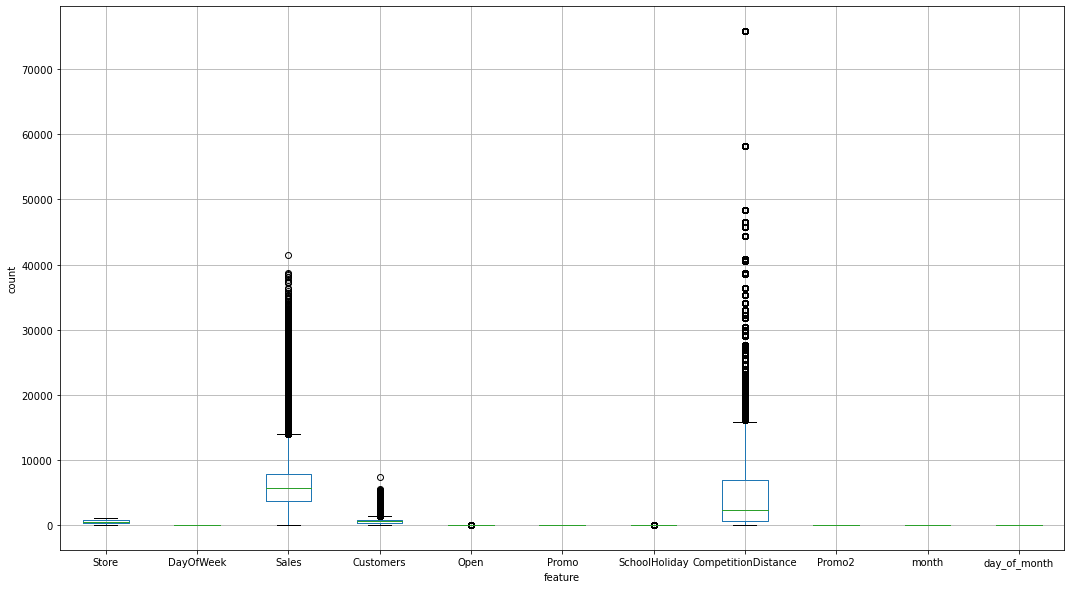

In [25]:
for col in numerical:
    plt.figure(figsize = (18,10))
    train_data.boxplot()
    plt.xlabel('feature')
    plt.ylabel('count')

In [26]:
def replace_outlier_with_median(train_data, feature):
    Q1 = train_data[feature].quantile(0.25)
    Q3 = train_data[feature].quantile(0.75)
    median = train_data[feature].quantile(0.50)
    IQR = Q3 - Q1
    upper_q = Q3 + (1.5 * IQR)
    lower_q = Q1 - (1.5 * IQR)
    train_data[feature] = np.where(train_data[feature] > upper_q, median, train_data[feature])
    train_data[feature] = np.where(train_data[feature] < lower_q, median, train_data[feature])

In [27]:
#outlier
replace_outlier_with_median(train_data, 'CompetitionDistance')

In [28]:
replace_outlier_with_median(train_data, 'Sales')

In [29]:
replace_outlier_with_median(train_data, 'Customers')

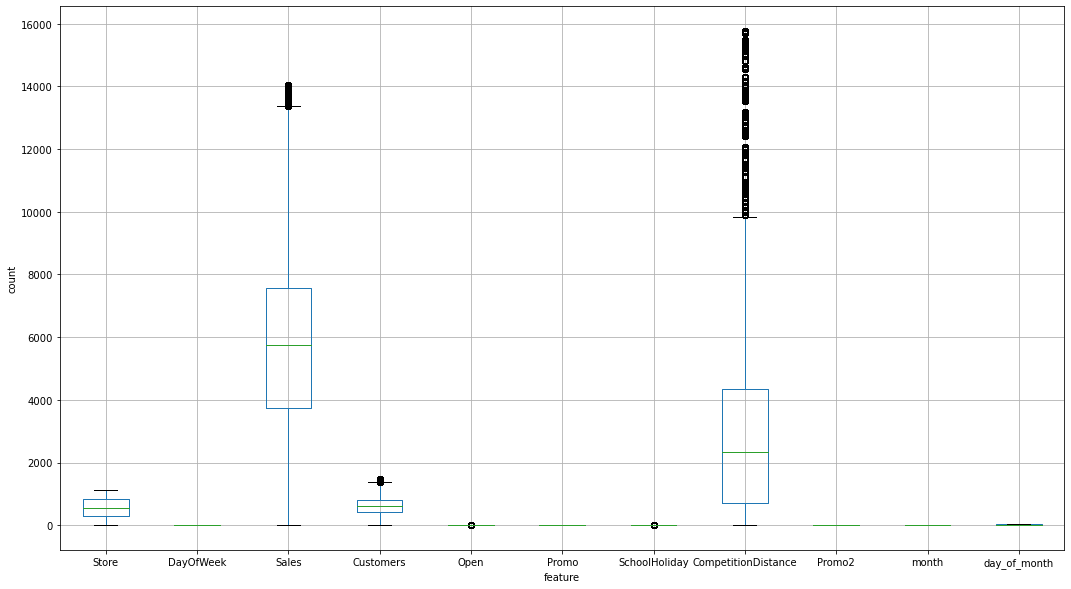

In [30]:
for col in numerical:
    plt.figure(figsize = (18,10))
    train_data.boxplot()
    plt.xlabel('feature')
    plt.ylabel('count')

In [31]:
train_data.to_csv('../data/train_data.csv', index=False)

# Test data

In [32]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [33]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [34]:
test_store.shape

(41088, 17)

In [35]:
test_store.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [36]:
# what is the % of missing values in the dataset?
def percent_missing(test_store):

    # Calculate total number of cells in dataframe
    totalCells = np.product(test_store.shape)

    # Count number of missing values per column
    missingCount = test_store.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(test_store)

The dataset contains 11.77 % missing values.


In [37]:
test_store.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [38]:
test_store['Open'].fillna(test_store['Open'].median(), inplace = True)
test_store['CompetitionDistance'].fillna(test_store['CompetitionDistance'].median(), inplace = True)

In [39]:
test_store.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [40]:
# Replace null values with unknown
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  test_store[str].fillna('unknown', inplace=True)

In [41]:
test_store['Date'] = pd.to_datetime(train_store['Date'], format='%Y-%m-%d')
test_store['StateHoliday'] = test_store['StateHoliday'].replace({0: '0'})
test_store['month'] = test_store['Date'].dt.month
test_store['day_of_month'] = test_store['Date'].dt.day
test_store.shape

(41088, 19)

In [42]:
numerical = []
categorical = []
timestamps = []

for col in test_store.columns:
    if test_store[col].dtype in ['float64']:
        numerical.append(col)
    elif test_store[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
test_store = test_store[features]
test_store.head(3)

,Open,CompetitionDistance,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,Store,DayOfWeek,Date,Promo,SchoolHoliday,Promo2,month,day_of_month
0,1.0,1270.0,0,c,a,9.0,2008.0,unknown,unknown,unknown,1,1,4,2015-07-31,1,0,0,7,31
1,1.0,14130.0,0,a,a,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,3,4,2015-07-31,1,0,1,7,31
2,1.0,24000.0,0,a,c,4.0,2013.0,unknown,unknown,unknown,3,7,4,2015-07-31,1,0,0,7,31


In [43]:
test_store[categorical].head(3)

,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,c,a,9.0,2008.0,unknown,unknown,unknown
1,0,a,a,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,0,a,c,4.0,2013.0,unknown,unknown,unknown


In [44]:
test_data = test_store
test_data.head(3)

,Open,CompetitionDistance,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,Store,DayOfWeek,Date,Promo,SchoolHoliday,Promo2,month,day_of_month
0,1.0,1270.0,0,c,a,9.0,2008.0,unknown,unknown,unknown,1,1,4,2015-07-31,1,0,0,7,31
1,1.0,14130.0,0,a,a,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,3,4,2015-07-31,1,0,1,7,31
2,1.0,24000.0,0,a,c,4.0,2013.0,unknown,unknown,unknown,3,7,4,2015-07-31,1,0,0,7,31


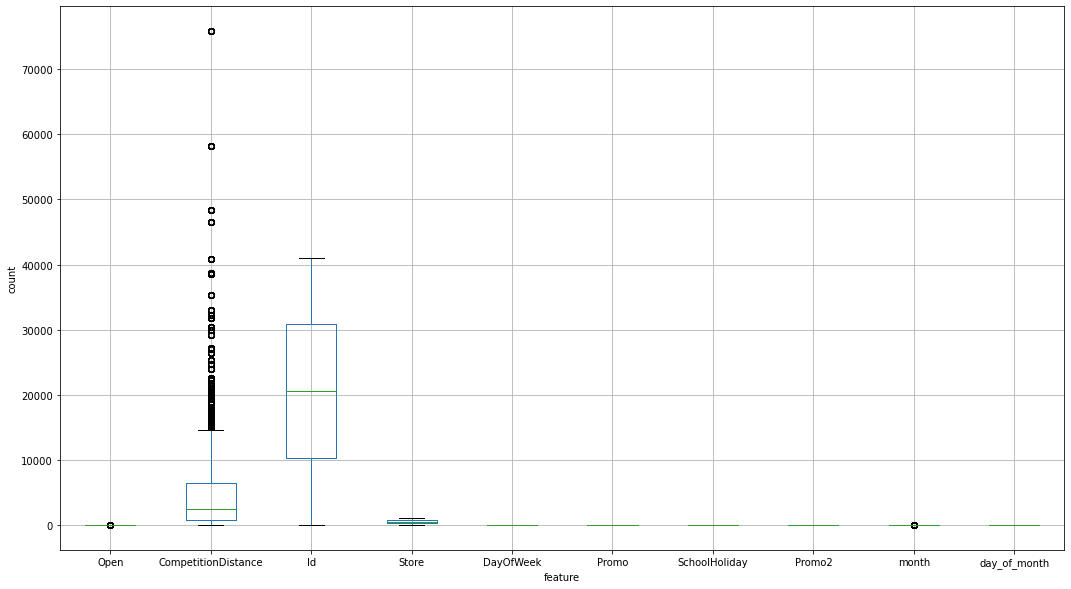

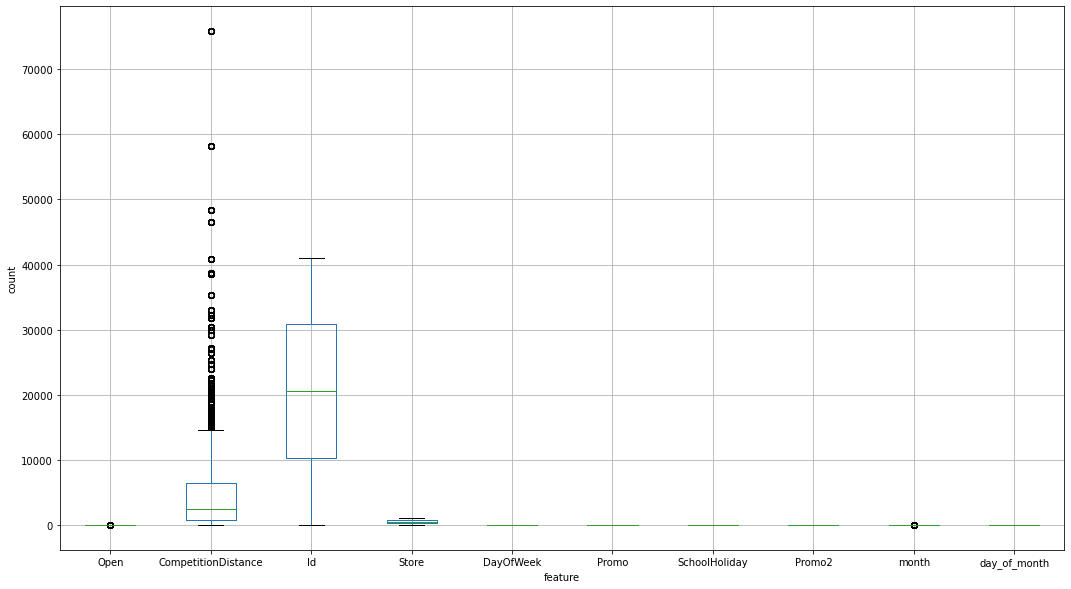

In [45]:
for col in numerical:
    plt.figure(figsize = (18,10))
    test_data.boxplot()
    plt.xlabel('feature')
    plt.ylabel('count')

In [46]:
def replace_outlier_with_median(test_data, feature):
    Q1 = test_data[feature].quantile(0.25)
    Q3 = test_data[feature].quantile(0.75)
    median = test_data[feature].quantile(0.50)
    IQR = Q3 - Q1
    upper_q = Q3 + (1.5 * IQR)
    lower_q = Q1 - (1.5 * IQR)
    test_data[feature] = np.where(test_data[feature] > upper_q, median, test_data[feature])
    test_data[feature] = np.where(test_data[feature] < lower_q, median, test_data[feature])

In [47]:
replace_outlier_with_median(test_data, 'CompetitionDistance')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance'>

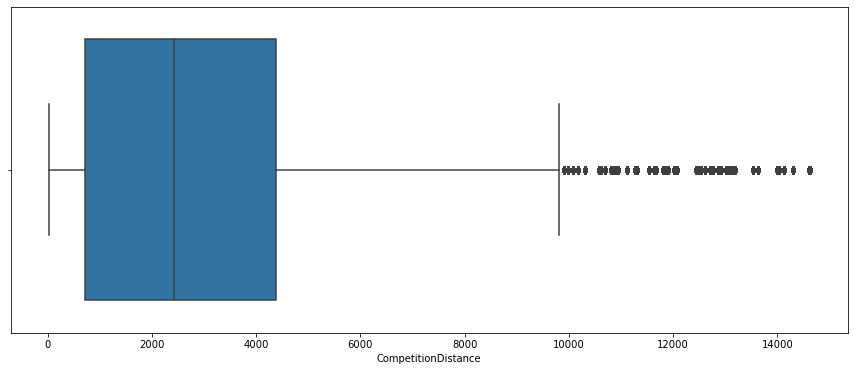

In [48]:
%matplotlib inline
plt.figure(figsize=(15,6))
sns.boxplot(test_data['CompetitionDistance'])

<AxesSubplot:>

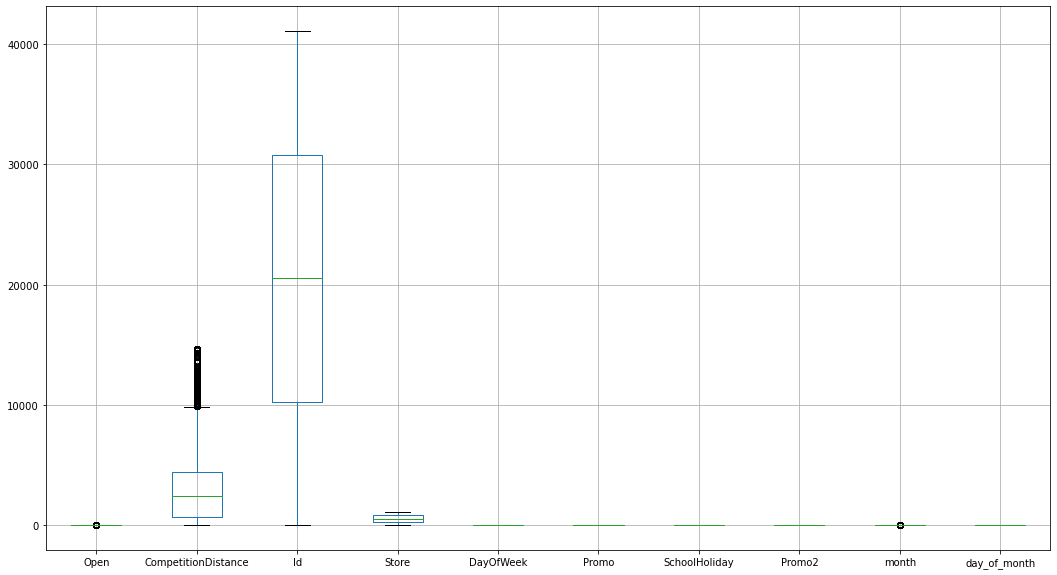

In [49]:
plt.figure(figsize = (18,10))
test_data.boxplot()

In [50]:
test_data.to_csv('../data/test_data.csv', index=False)